In [2]:
import pickle
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import numpy as np
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.cross_validation import train_test_split
pd.options.mode.chained_assignment = None
sns.set(style="darkgrid", color_codes=True)
%matplotlib inline

with open("TEST_movie_data.pkl", 'r') as picklefile:
     all_movies = pickle.load(picklefile)
        
with open("director_movie_data.pkl", 'r') as picklefile:
     all_dir = pickle.load(picklefile)

In [3]:
dir_df = pd.DataFrame(all_dir)
dir_df.head()

,director,lifetime_films,lifetime_gross
0,Steven Spielberg,27,4155901520
1,Michael Bay,11,2143487601
2,Peter Jackson,12,2134703921
3,Robert Zemeckis,16,2039446164
4,James Cameron,9,1974307733


In [4]:
df = pd.DataFrame(all_movies)
df['production_budget'] = df['production_budget']*1000000
df['budget'] = 0
df['budget'][df['imdb_budget'] != 0]  = df['imdb_budget']
df['budget'][df['imdb_budget'] == 0]  = df['production_budget']
df['ones'] = int(1)
df['month'] = df['release_date'].map(lambda x: x.month)
df['roi'] = df['worldwide_gross']/df['budget']
df['roi'] = df['roi'].where(df['roi']!=0, np.nan) 
df['worldwide_gross'] = df['worldwide_gross'].where(df['worldwide_gross']!=0, np.nan) 
df['foreign_gross'] = df['foreign_gross'].where(df['foreign_gross']!=0, np.nan) 
df['budget'] = df['budget'].where(df['budget']!=0, np.nan) 
df = df.sort(['domestic_gross'], ascending = False)
df = df[df.budget <= 270000000]
df = df.merge(dir_df,on='director')
df['lifetime_films'] = df['lifetime_films'].where(df['lifetime_films']!=0, np.nan) 
df['lifetime_gross'] = df['lifetime_gross'].where(df['lifetime_gross']!=0, np.nan) 
df['lifetime_films'] = df['lifetime_films'].astype('int')
df

,director,distributor,domestic_gross,foreign_gross,genre,imdb_budget,production_budget,rating,release_date,runtime,title,worldwide_gross,budget,ones,month,roi,lifetime_films,lifetime_gross
0,Joss Whedon,Buena Vista,623357910,896200000,Action / Adventure,220000000,220000000,PG-13,2012-05-04,142,Marvel's The Avengers,1519557910,220000000,1,5,6.907081,4,1108509963
1,Christopher Nolan,Warner Bros.,448139099,636300000,Action Thriller,250000000,250000000,PG-13,2012-07-20,165,The Dark Knight Rises,1084439099,250000000,1,7,4.337756,9,1816484940
2,Christopher Nolan,Paramount,188020017,484700000,Sci-Fi Adventure,165000000,165000000,PG-13,2014-11-05,169,Interstellar,672720017,165000000,1,11,4.077091,9,1816484940
3,Francis Lawrence,Lionsgate,424668047,440244916,Action / Adventure,130000000,130000000,PG-13,2013-11-22,146,The Hunger Games: Catching Fire,864912963,130000000,1,11,6.653177,5,1152882837
4,Francis Lawrence,Lionsgate,337135885,414964344,Action / Adventure,125000000,125000000,PG-13,2014-11-21,123,The Hunger Games: Mockingjay - Part 1,752100229,125000000,1,11,6.016802,5,1152882837
5,Shane Black,Buena Vista,409013994,806426000,Action / Adventure,200000000,200000000,PG-13,2013-05-03,129,Iron Man 3,1215439994,200000000,1,5,6.077200,2,413257750
6,Gary Ross,Lionsgate,408010692,283237076,Action / Adventure,78000000,78000000,PG-13,2012-03-23,142,The Hunger Games,691247768,78000000,1,3,8.862151,3,568872967
7,Chris Buck,Buena Vista,400738009,873481000,Animation,150000000,150000000,PG,2013-11-22,108,Frozen,1274219009,150000000,1,11,8.494793,3,630697522
8,Pierre Coffin,Universal,368061265,602700620,Animation,76000000,76000000,PG,2013-07-03,98,Despicable Me 2,970761885,76000000,1,7,12.773183,3,748239665
9,Clint Eastwood,Warner Bros.,350126372,197000000,Drama,58800000,58800000,R,2014-12-25,132,American Sniper,547126372,58800000,1,12,9.304870,33,1690952072


###Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [188]:
y1, X1 = dmatrices('domestic_gross ~ 1', data=df, return_type='dataframe')
model1 = sm.OLS(y1, X1)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Jul 2015   Prob (F-statistic):                nan
Time:                        21:13:03   Log-Likelihood:                -8009.2
No. Observations:                 407   AIC:                         1.602e+04
Df Residuals:                     406   BIC:                         1.602e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   7.075e+07   4.22e+06     16.747      0.000      6.24e+07  7.91e+07
==============================================================================
Omnibus:                      223.624   Durbin-Watson:                   0.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1322.862
Skew:                           2.378   Prob(JB):                    5.55e-288
Kurtosis:                      10.443   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using a constant term as the predictor for domestic total gross is not an effective model.  This is shown by the R^2 and adjusted R^2 values being 0. This model basically predicts that the domestic gross will always be $70,750,000.

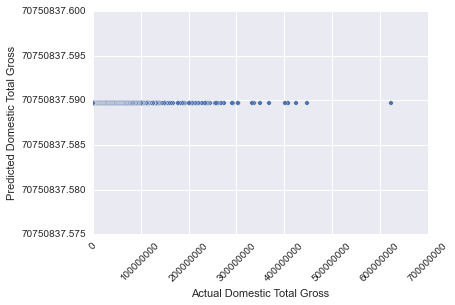

In [139]:
y1pred = results1.predict()
plt.scatter(y1, y1pred)
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.ticklabel_format(useOffset=False, style='plain')
plt.xlim(xmin=0)
plt.xlabel("Actual Domestic Total Gross")
plt.ylabel("Predicted Domestic Total Gross")
plt.xticks(rotation=45)
plt.show()

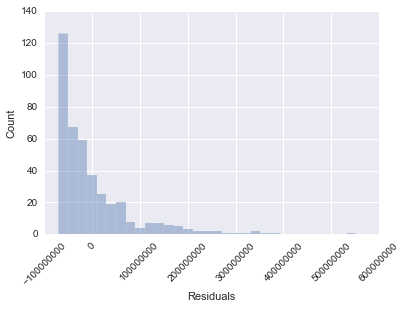

In [140]:
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.ticklabel_format(useOffset=False, style='plain')
y1res = results1.resid
sns.distplot(y1res, kde = False)
plt.xticks(rotation=45)
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()

Not surprisingly, the residuals are not normally distributed. Many movies are being predicted at \$100 million off from the actual gross in one direction, and there are movies that have a predicted value up to \$500 million off from the actual value in the other direction.


###Challenge 2
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [6]:
y2, X2 = dmatrices('domestic_gross ~ budget', data=df, return_type='dataframe')
model2 = sm.OLS(y2, X2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     376.3
Date:                Thu, 16 Jul 2015   Prob (F-statistic):           9.36e-60
Time:                        19:59:26   Log-Likelihood:                -7875.5
No. Observations:                 407   AIC:                         1.575e+04
Df Residuals:                     405   BIC:                         1.576e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.551e+07   4.17e+06      3.720      0.000      7.31e+06  2.37e+07
budget         1.0509      0.054     19.398      0.000         0.944     1.157
==============================================================================
Omnibus:                      185.466   Durbin-Watson:                   1.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1334.203
Skew:                           1.795   Prob(JB):                    1.91e-290
Kurtosis:                      11.111   Cond. No.                     1.05e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

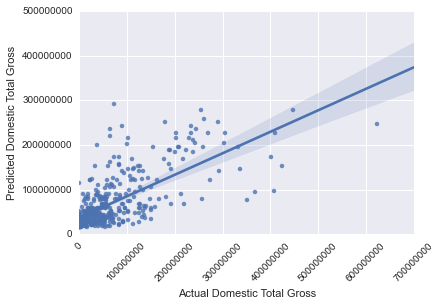

In [149]:
y2pred = results2.predict()
sns.regplot(x=y2, y=y2pred, data = df)
plt.xlabel("Actual Domestic Total Gross")
plt.ylabel("Predicted Domestic Total Gross")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.ticklabel_format(useOffset=False, style='plain')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xticks(rotation=45)
plt.show()

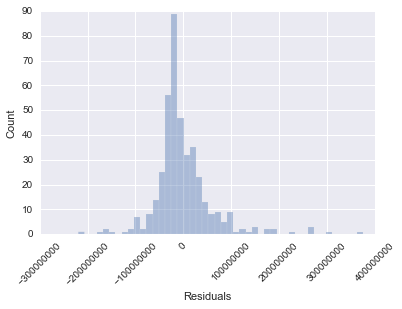

In [157]:
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.ticklabel_format(useOffset=False, style='plain')
y2res = results2.resid
sns.distplot(y2res, kde = False)
plt.xticks(rotation=45)
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()

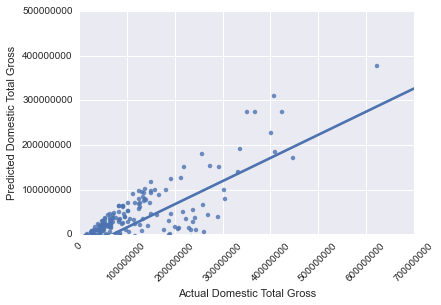

In [163]:
y2pred = results2.predict()
sns.regplot(x=y2, y=y2res, data = df, ci = None)
plt.xlabel("Actual Domestic Total Gross")
plt.ylabel("Predicted Domestic Total Gross")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.ticklabel_format(useOffset=False, style='plain')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xticks(rotation=45)
plt.show()

I looked at the relationship between the domestic gross and the budget. (As a side note, my data set uses budget information from both box office mojo and IMDB, so that I could minimize the number of movies I had to exclude for not having enough information.)  It appears that when a movie grosses more, there will be more error in the prediction.

###Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [167]:
y3, X3 = dmatrices('domestic_gross ~ budget + rating', data=df, return_type='dataframe')
model3 = sm.OLS(y3, X3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     62.45
Date:                Wed, 15 Jul 2015   Prob (F-statistic):           1.84e-54
Time:                        21:07:06   Log-Likelihood:                -7874.7
No. Observations:                 407   AIC:                         1.576e+04
Df Residuals:                     400   BIC:                         1.579e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            4.4e+07   4.45e+07      0.988      0.324     -4.36e+07  1.32e+08
rating[T.NC-17]   -5.334e+07    7.6e+07     -0.702      0.483     -2.03e+08  9.61e+07
rating[T.PG]      -1.967e+07   4.47e+07     -0.440      0.660     -1.08e+08  6.82e+07
rating[T.PG-13]   -2.729e+07   4.41e+07     -0.618      0.537     -1.14e+08  5.95e+07
rating[T.R]       -2.977e+07   4.45e+07     -0.669      0.504     -1.17e+08  5.77e+07
rating[T.Unrated]  -4.59e+07   7.61e+07     -0.603      0.547     -1.95e+08  1.04e+08
budget                1.0298      0.059     17.314      0.000         0.913     1.147
==============================================================================
Omnibus:                      189.122   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1371.768
Skew:                           1.836   Prob(JB):                    1.33e-298
Kurtosis:                      11.210   Cond. No.                     2.91e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

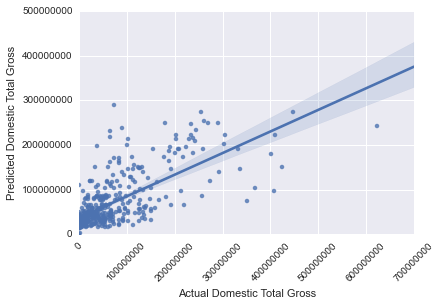

In [165]:
y3pred = results3.predict()
sns.regplot(x=y3, y=y3pred, data = df)
plt.xlabel("Actual Domestic Total Gross")
plt.ylabel("Predicted Domestic Total Gross")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.ticklabel_format(useOffset=False, style='plain')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xticks(rotation=45)
plt.show()

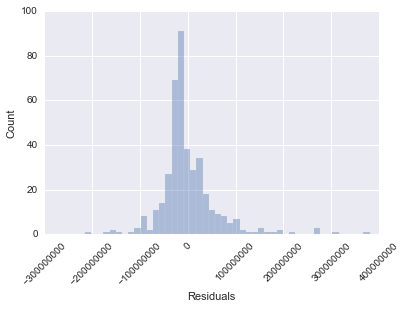

In [168]:
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.ticklabel_format(useOffset=False, style='plain')
y3res = results3.resid
sns.distplot(y3res, kde = False)
plt.xticks(rotation=45)
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()

###Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [16]:
y4, X4 = dmatrices('domestic_gross ~ budget + lifetime_gross/lifetime_films', data=df, return_type='dataframe')
model4 = sm.OLS(y4, X4)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     152.5
Date:                Thu, 16 Jul 2015   Prob (F-statistic):           4.96e-66
Time:                        20:01:22   Log-Likelihood:                -7854.8
No. Observations:                 407   AIC:                         1.572e+04
Df Residuals:                     403   BIC:                         1.573e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
Intercept                      7.709e+06   4.16e+06      1.854      0.065     -4.67e+05  1.59e+07
budget                            0.8073      0.064     12.657      0.000         0.682     0.933
lifetime_gross                    0.0921      0.015      6.101      0.000         0.062     0.122
lifetime_gross:lifetime_films    -0.0031      0.001     -4.308      0.000        -0.004    -0.002
==============================================================================
Omnibus:                      170.950   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1264.479
Skew:                           1.611   Prob(JB):                    2.64e-275
Kurtosis:                      11.012   Cond. No.                     1.39e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

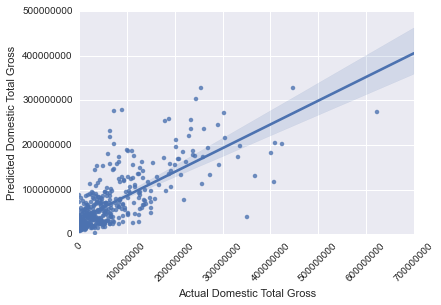

In [17]:
y4pred = results4.predict()
sns.regplot(x=y4, y=y4pred, data = df)
plt.xlabel("Actual Domestic Total Gross")
plt.ylabel("Predicted Domestic Total Gross")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.ticklabel_format(useOffset=False, style='plain')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xticks(rotation=45)
plt.show()

###Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    X4, y4, test_size=0.25, random_state=0)

model5 = LinearRegression()
model5.fit(x_train, y_train)
model5.score(x_test, y_test)

0.53905935945627559

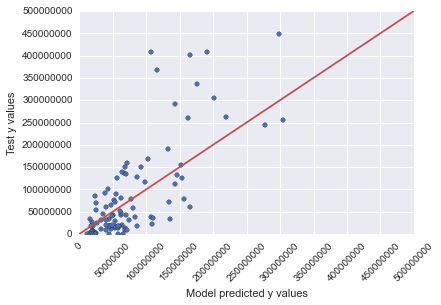

In [19]:
ytestpred = model5.predict(x_test)
plt.scatter(x=ytestpred, y=y_test)
plt.xlabel("Model predicted y values")
plt.ylabel("Test y values")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xticks(np.arange(0, 550000000, 50000000))
ax.set_yticks(np.arange(0, 550000000, 50000000))
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xticks(rotation=45)
plt.plot([0,550000000],[0,550000000],'r')
plt.show()